In [87]:
import sys
import os
sys.path.append(os.path.abspath("../ge"))

from scraper import get_prices

import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt
from typing import Optional

SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=MED)    # fontsize of the axes title
plt.rc('axes', labelsize=MED)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=LARGE)       # controls default text sizes

pd.set_option('display.max_rows', 200)

metadata = pd.read_csv('../data/item_metadata.csv')[['id', 'name']].add_prefix('item_')
metadata.head(3)

,item_id,item_name
0,2,Cannonball
1,6,Cannon base
2,8,Cannon stand


In [99]:
prices = get_prices().merge(metadata, on='item_id', how='left')

prices['avgHighPrice'] = prices.sort_values('timestamp').groupby(['item_id', 'timestep']).avgHighPrice.ffill()
prices['avgLowPrice' ] = prices.sort_values('timestamp').groupby(['item_id', 'timestep']).avgLowPrice .ffill()

numer = prices.avgHighPrice*prices.highPriceVolume + prices.avgLowPrice*prices.lowPriceVolume
denom = prices.highPriceVolume + prices.lowPriceVolume
prices['vwap'] = numer / denom

prices[prices.timestep == '5m'].sort_values('timestamp')

,item_id,timestep,timestamp,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,datetime,item_name,vwap
2920,8,5m,1726684200,NaN,188256.0,0,2,2024-09-19 04:30:00+10:00,Cannon stand,NaN
2921,8,5m,1726684500,NaN,188256.0,0,2,2024-09-19 04:35:00+10:00,Cannon stand,NaN
2922,8,5m,1726684800,NaN,188256.0,0,1,2024-09-19 04:40:00+10:00,Cannon stand,NaN
2923,8,5m,1726685100,191649.0,188256.0,3,1,2024-09-19 04:45:00+10:00,Cannon stand,190800.750000
2924,8,5m,1726685400,191649.0,188256.0,0,1,2024-09-19 04:50:00+10:00,Cannon stand,188256.000000
...,...,...,...,...,...,...,...,...,...,...
3284,8,5m,1726839900,189241.0,182716.0,1,1,2024-09-20 23:45:00+10:00,Cannon stand,185978.500000
1824,6,5m,1726839900,196797.0,191288.0,0,1,2024-09-20 23:45:00+10:00,Cannon base,191288.000000
362,2,5m,1726839900,191.0,186.0,78492,10055,2024-09-20 23:45:00+10:00,Cannonball,190.432222
363,2,5m,1726840200,192.0,188.0,42481,14864,2024-09-20 23:50:00+10:00,Cannonball,190.963188


In [137]:
d

,item_id,timestep,timestamp,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,datetime,item_name,vwap
3070,8,5m,1726750500,196498.0,190992.0,0,1,2024-09-19 22:55:00+10:00,Cannon stand,190992.000000
3071,8,5m,1726750800,196043.0,189675.0,1,1,2024-09-19 23:00:00+10:00,Cannon stand,192859.000000
3072,8,5m,1726751100,196043.0,190113.0,0,1,2024-09-19 23:05:00+10:00,Cannon stand,190113.000000
3073,8,5m,1726751700,195589.0,190552.0,1,2,2024-09-19 23:15:00+10:00,Cannon stand,192231.000000
3074,8,5m,1726752000,195589.0,190556.0,0,2,2024-09-19 23:20:00+10:00,Cannon stand,190556.000000
3075,8,5m,1726752300,195136.0,189675.0,1,2,2024-09-19 23:25:00+10:00,Cannon stand,191495.333333
3076,8,5m,1726752600,194684.0,190113.0,1,5,2024-09-19 23:30:00+10:00,Cannon stand,190874.833333
3077,8,5m,1726752900,190561.0,190845.0,1,3,2024-09-19 23:35:00+10:00,Cannon stand,190774.000000
3078,8,5m,1726753200,190561.0,190845.0,1,0,2024-09-19 23:40:00+10:00,Cannon stand,190561.000000
3079,8,5m,1726753800,190561.0,189224.0,0,1,2024-09-19 23:50:00+10:00,Cannon stand,189224.000000


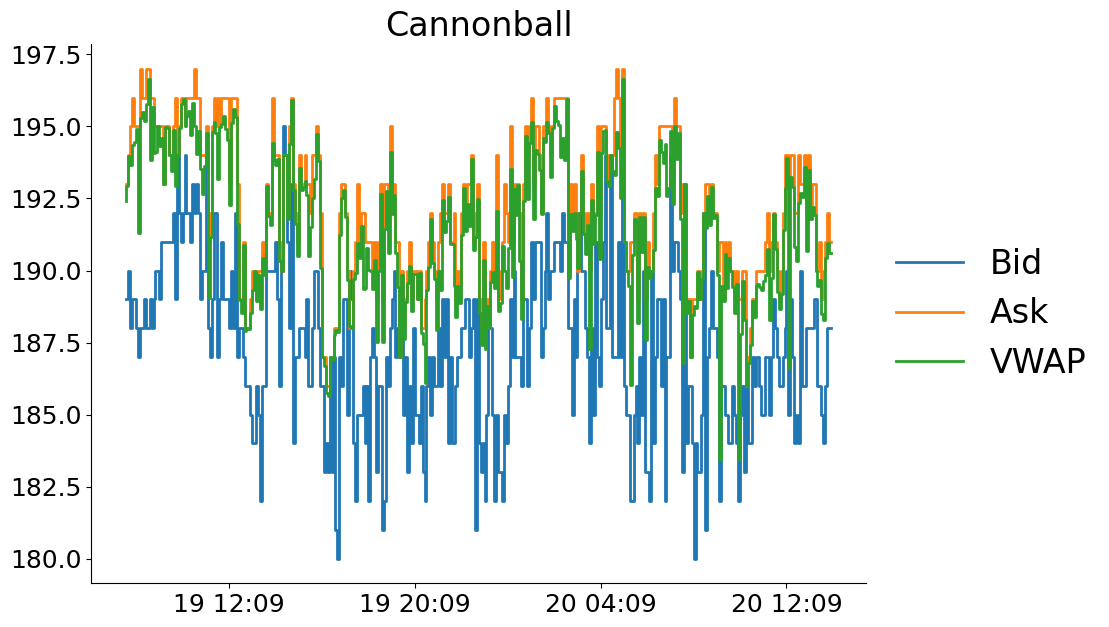

In [147]:
d = prices[(prices.timestep == '5m') & (prices.item_id == 2)]

fig, ax = plt.subplots(figsize=(10, 7))

ax.step(d.datetime, d.avgLowPrice , label='Bid', lw=2)
ax.step(d.datetime, d.avgHighPrice, label='Ask', lw=2)
ax.step(d.datetime, d.vwap, label='VWAP', lw=2)

ax.xaxis.set_major_formatter(DateFormatter('%d %H:%m'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=8))

ax.set_title(d.item_name.iloc[0])

ax.legend(frameon=False, bbox_to_anchor=(1, 0.5), loc='center left')

sns.despine()
plt.show()

In [250]:
data['value_traded'] = data.price * data.volume
d = (data.groupby('id').value_traded.max() / 1_000_000).sort_values().reset_index()
d['name'] = d['id'].replace(name_map)
d

,id,value_traded,name
0,123,0.154688,Attack potion(2)
1,125,0.463428,Attack potion(1)
2,28,0.973152,Insect repellent
3,117,2.529954,Strength potion(2)
4,36,2.995961,Candle
5,127,3.998896,Restore potion(3)
6,121,4.042050,Attack potion(3)
7,50,5.166512,Shortbow (u)
8,119,6.310842,Strength potion(1)
9,48,6.580320,Longbow (u)


In [166]:
table = pd.pivot_table(data, index='timestamp', columns='id', values=['price', 'volume']).reset_index()
table['datetime'] = pd.to_datetime(table.timestamp, unit='ms').dt.tz_localize('UTC').dt.tz_convert(tz)
table

timestamp     price                                                  \
id                         10     101     103     105     107     109     111   
0     1425600000000       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     1425686400000       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     1425772800000       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     1425859200000       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     1425945600000       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...             ...       ...     ...     ...     ...     ...     ...     ...   
3409  1726454109000  185987.0  1683.0  3843.0  3901.0  4139.0  2730.0  4320.0   
3410  1726595896000  186605.0  1633.0  3929.0  4018.0  4117.0  2601.0  4320.0   
3411  1726630945000  186605.0  1629.0  3972.0  4116.0  4087.0  2601.0  4320.0   
3412  1726740891000  188060.0  1621.0  4019.0  3986.0  4002.0  2564.0  4299.0   
3413  1726824194000  188060.0  1646.0  3967.0  3941.0  3957.0  2579.0  4299.0   

                    ...    volume                                         \
id      113    115  ...        68         70        72       8        91   
0     601.0  436.0  ...       NaN        NaN       NaN     NaN       NaN   
1     570.0  414.0  ...       NaN        NaN       NaN     NaN       NaN   
2     541.0  395.0  ...       NaN        NaN       NaN     NaN       NaN   
3     513.0  375.0  ...       NaN        NaN       NaN     NaN       NaN   
4     487.0  375.0  ...       NaN        NaN       NaN     NaN       NaN   
...     ...    ...  ...       ...        ...       ...     ...       ...   
3409  133.0   82.0  ...  175502.0  3374209.0  153277.0   812.0  374020.0   
3410  132.0   82.0  ...  354578.0  6621382.0  339540.0  1406.0  674389.0   
3411  132.0   81.0  ...  103720.0  1404452.0   95432.0   425.0  179732.0   
3412  129.0   81.0  ...  168840.0  3771004.0  345773.0  1080.0  524111.0   
3413  130.0   80.0  ...  171507.0  2838998.0  304091.0   836.0  346030.0   

                                                                datetime  
id          93        95         97         99                            
0          NaN       NaN        NaN        NaN 2015-03-06 11:00:00+11:00  
1          NaN       NaN        NaN        NaN 2015-03-07 11:00:00+11:00  
2          NaN       NaN        NaN        NaN 2015-03-08 11:00:00+11:00  
3          NaN       NaN        NaN        NaN 2015-03-09 11:00:00+11:00  
4          NaN       NaN        NaN        NaN 2015-03-10 11:00:00+11:00  
...        ...       ...        ...        ...                       ...  
3409   36974.0  337135.0   714021.0  1410737.0 2024-09-16 12:35:09+10:00  
3410  185515.0  533089.0  1419876.0  2472368.0 2024-09-18 03:58:16+10:00  
3411   60899.0  180032.0   260601.0   649308.0 2024-09-18 13:42:25+10:00  
3412   52878.0  550323.0  1080254.0  1820208.0 2024-09-19 20:14:51+10:00  
3413   40170.0  421260.0   633717.0  1359640.0 2024-09-20 19:23:14+10:00  

[3414 rows x 102 columns]

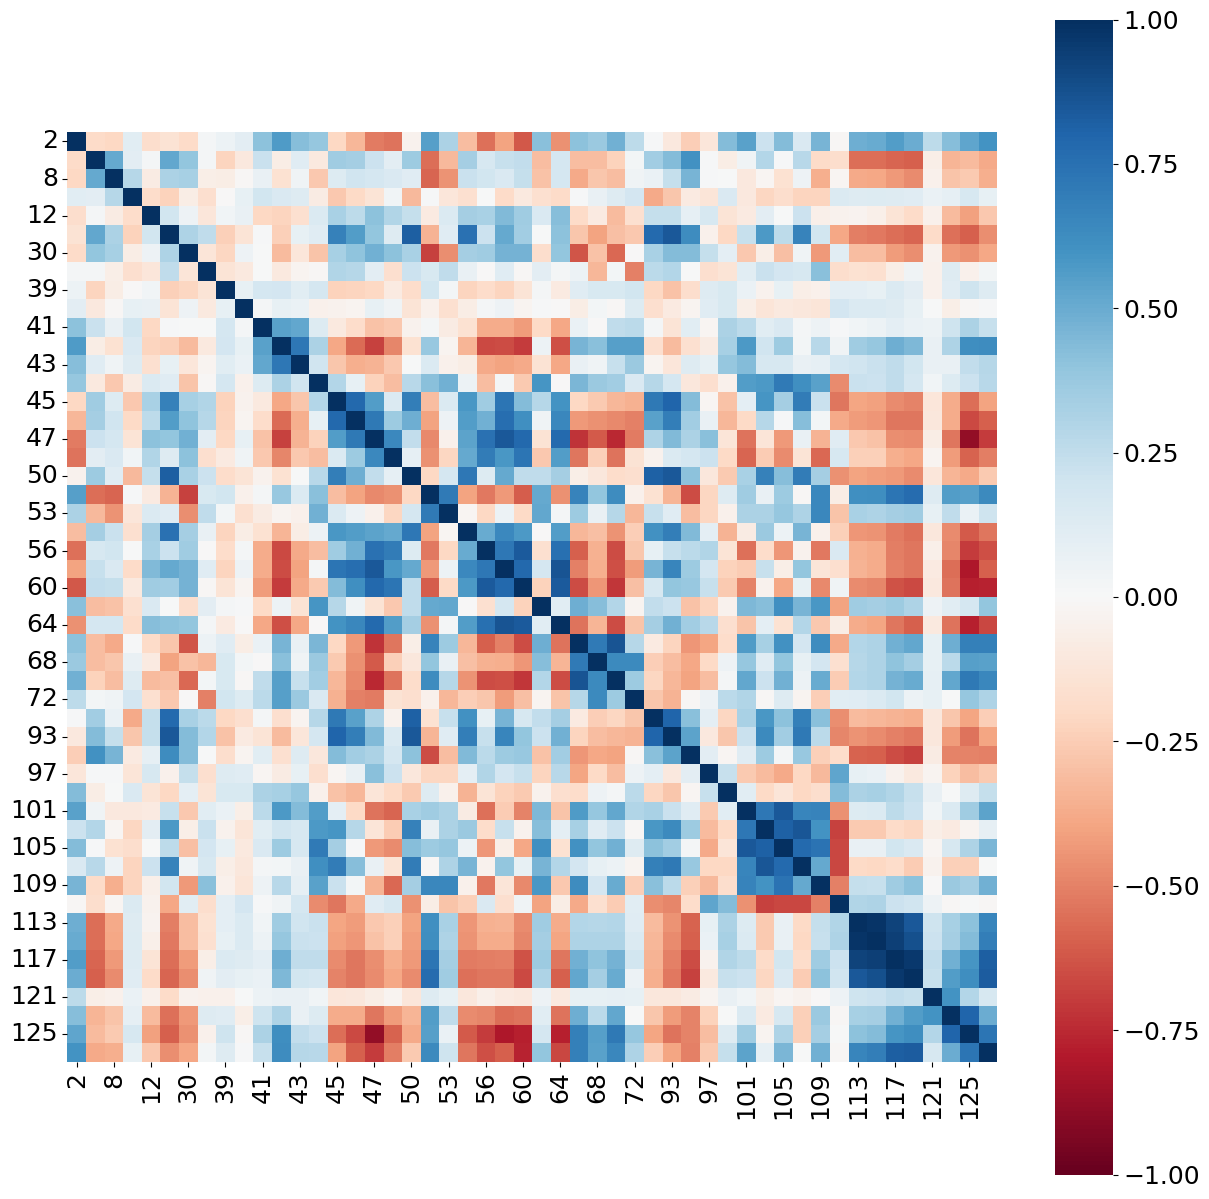

In [210]:
fig, ax = plt.subplots(figsize=(15, 15))

df = table.price
df.columns = [int(i) for i in df.columns]
sns.heatmap(df[sorted(df.columns)].corr(), cmap='RdBu', vmin=-1, vmax=1, square=True, ax=ax)

plt.show()

In [160]:
metadata = pd.read_csv('../data/item_metadata.csv')
metadata.head(3)

,examine,id,members,lowalch,limit,value,highalch,icon,name,price,last,volume
0,Ammo for the Dwarf Cannon.,2,True,2.0,11000.0,5,3.0,Cannonball.png,Cannonball,190.0,196.0,81832106.0
1,The cannon is built on this.,6,True,75000.0,70.0,187500,112500.0,Cannon base.png,Cannon base,196797.0,196797.0,877.0
2,The mounting for the multicannon.,8,True,75000.0,70.0,187500,112500.0,Cannon stand.png,Cannon stand,190561.0,190561.0,836.0


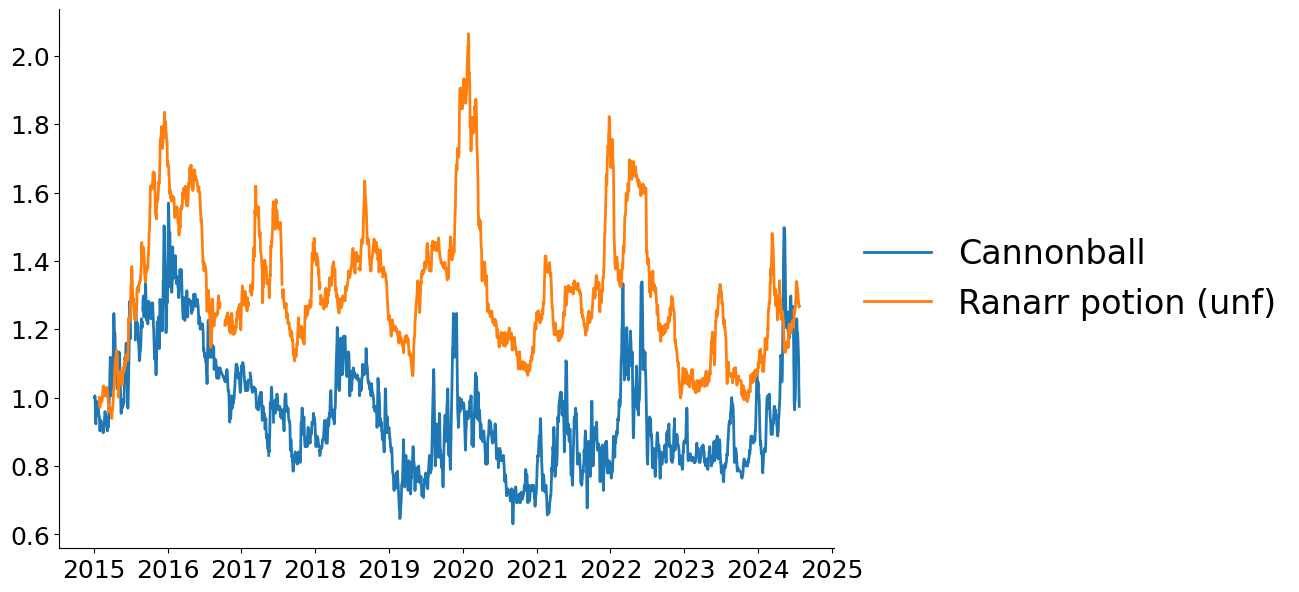

In [254]:
fig, ax = plt.subplots(figsize=(10, 7))

for item in [2, 99]:
    name = metadata[metadata.id == item].name.iloc[0]
    
    price = table['price'][str(item)]
    ax.plot(table.datetime, price/price[price.notna()].iloc[0], label=name, lw=2)

ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

ax.legend(frameon=False, bbox_to_anchor=(1, 0.5), loc='center left')

sns.despine()
plt.show()

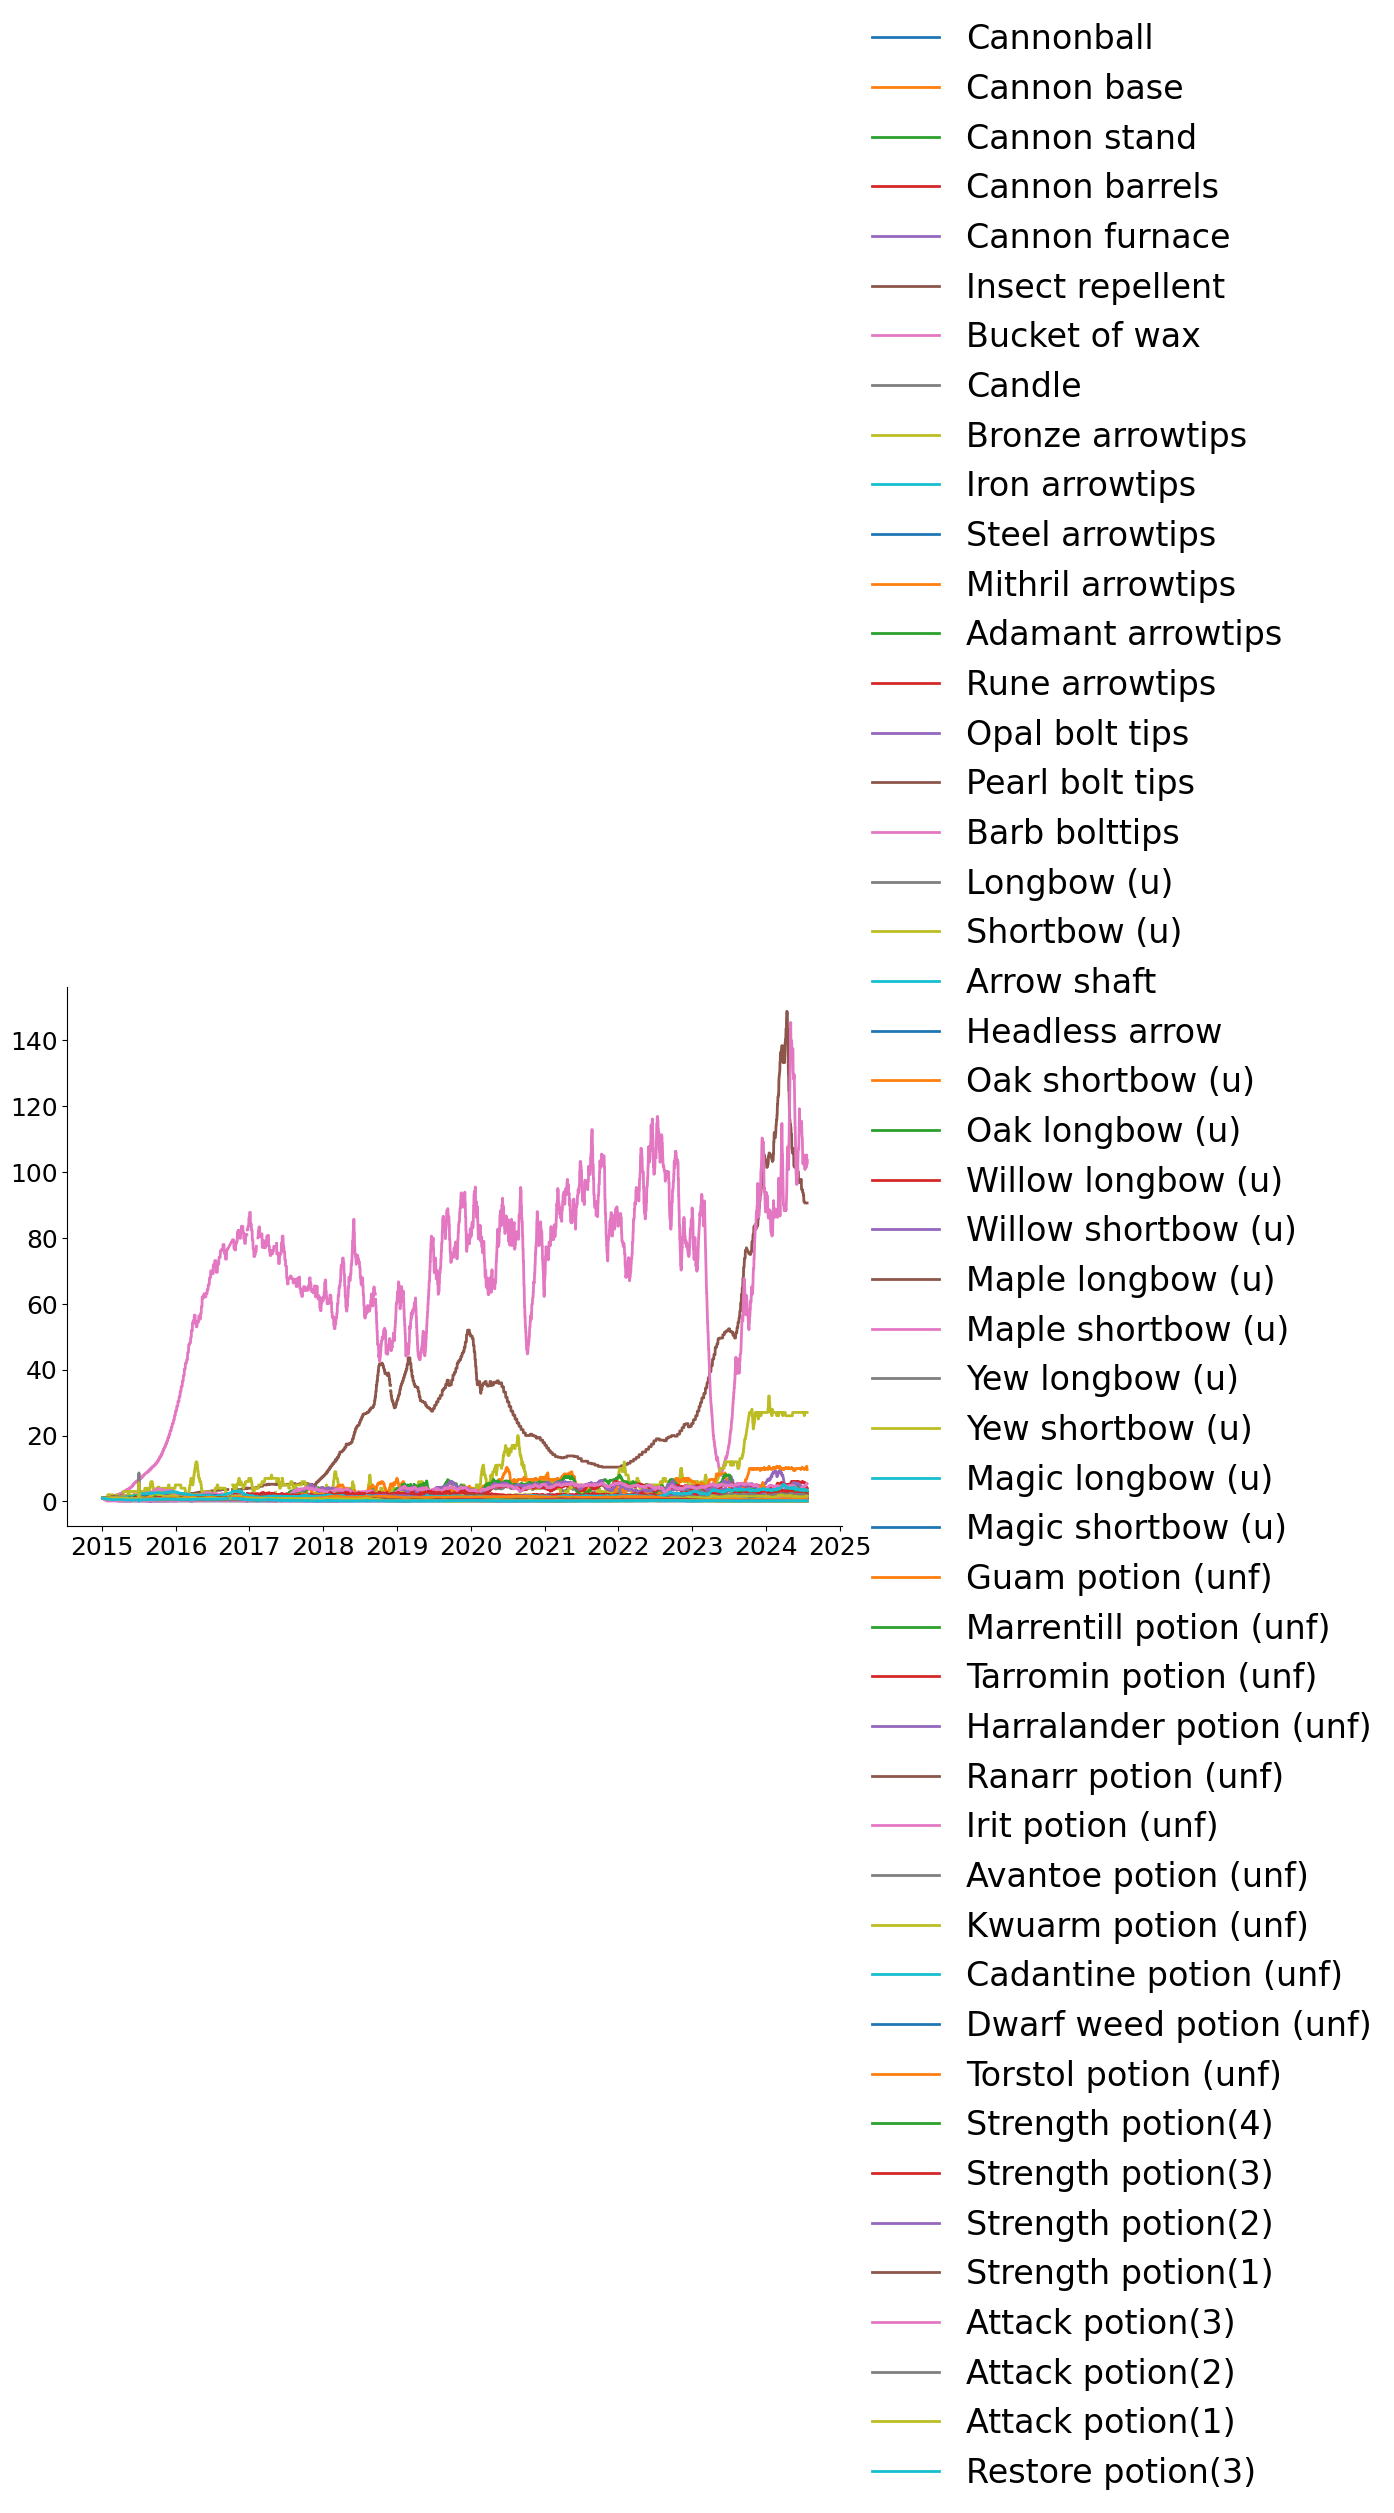

In [172]:
fig, ax = plt.subplots(figsize=(10, 7))

for item in ALL_ITEMS[:50]:
    name = metadata[metadata.id == item].name.iloc[0]
    
    price = table['price'][str(item)]
    ax.plot(table.datetime, price/price[price.notna()].iloc[0], label=name, lw=2)

ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

ax.legend(frameon=False, bbox_to_anchor=(1, 0.5), loc='center left')

sns.despine()
plt.show()